# Assignment 1. Music Century Classification

In this assignment, we will build models to predict which
**century** a piece of music was released.  We will be using the "YearPredictionMSD Data Set"
based on the Million Song Dataset. The data is available to download from the UCI
Machine Learning Repository. Here are some links about the data:

- https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd
- http://millionsongdataset.com/pages/tasks-demos/#yearrecognition

Note that you are note allowed to import additional packages **(especially not PyTorch)**. One of the objectives is to understand how the training procedure actually operates, before working with PyTorch's autograd engine which does it all for us.


## Question 1. Data (21%)

Start by setting up a Google Colab notebook in which to do your work.
Since you are working with a partner, you might find this link helpful:

- https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb

The recommended way to work together is pair coding, where you and your partner are sitting together and writing code together.

To process and read the data, we use the popular `pandas` package for data analysis.

In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

Now that your notebook is set up, we can load the data into the notebook. The code below provides
two ways of loading the data: directly from the internet, or through mounting Google Drive.
The first method is easier but slower, and the second method is a bit involved at first, but
can save you time later on. You will need to mount Google Drive for later assignments, so we recommend
figuring how to do that now.

Here are some resources to help you get started:

- http.://colab.research.google.com/notebooks/io.ipynb

In [ ]:
load_from_drive = True

if not load_from_drive:
  csv_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip"
else:
  from google.colab import drive
  drive.mount('/content/gdrive')
  csv_path = '/content/gdrive/MyDrive/DP_course/YearPredictionMSD.txt.zip' # TODO - UPDATE ME WITH THE TRUE PATH!

t_label = ["year"]
x_labels = ["var%d" % i for i in range(1, 91)]
df = pandas.read_csv(csv_path, names=t_label + x_labels)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Now that the data is loaded to your Colab notebook, you should be able to display the Pandas
DataFrame `df` as a table:

In [ ]:
df

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


To set up our data for classification, we'll use the "year" field to represent
whether a song was released in the 20-th century. In our case `df["year"]` will be 1 if
the year was released after 2000, and 0 otherwise.

In [ ]:
df["year"] = df["year"].map(lambda x: int(x > 2000))

In [ ]:
df.head(20)

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,1,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,1,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,1,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,1,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
5,1,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263
6,1,50.57546,33.17843,50.53517,11.55217,-27.24764,-8.78206,-12.04282,-9.53930,28.61811,...,11.63681,25.44182,134.62382,21.51982,8.17570,35.46251,11.57736,4.50056,-4.62739,1.40192
7,1,48.26892,8.97526,75.23158,24.04945,-16.02105,-14.09491,8.11871,-1.87566,7.46701,...,18.03989,-58.46192,-65.56438,46.99856,-4.09602,56.37650,-18.29975,-0.30633,3.98364,-3.72556
8,1,49.75468,33.99581,56.73846,2.89581,-2.92429,-26.44413,1.71392,-0.55644,22.08594,...,18.70812,5.20391,-27.75192,17.22100,-0.85210,-15.67150,-26.36257,5.48708,-9.13495,6.08680
9,1,45.17809,46.34234,-40.65357,-2.47909,1.21253,-0.65302,-6.95536,-12.20040,17.02512,...,-4.36742,-87.55285,-70.79677,76.57355,-7.71727,3.26926,-298.49845,11.49326,-89.21804,-15.09719


### Part (a) -- 7%

The data set description text asks us to respect the below train/test split to
avoid the "producer effect". That is, we want to make sure that no song from a single artist
ends up in both the training and test set.

Explain why it would be problematic to have
some songs from an artist in the training set, and other songs from the same artist in the
test set. (Hint: Remember that we want our test accuracy to predict how well the model
will perform in practice on a song it hasn't learned about.)

In [ ]:
df_train = df[:463715]
df_test = df[463715:]

# convert to numpy
train_xs = df_train[x_labels].to_numpy()
train_ts = df_train[t_label].to_numpy()
test_xs = df_test[x_labels].to_numpy()
test_ts = df_test[t_label].to_numpy()

# Write your explanation here


It is problematic to use in the test data a song from an artist that the network used for learning because then our network can classify songs that were recorded in different centuries but because they are from the same artist they have similar properties and thus classified incorrectly

In addition even if the songs were recorded in the same century, it will be easier for the network to classify the songs century because it did the learning proccess on smilar song and by that give us false indecation about the the model generalization.

### Part (b) -- 7%

It can be beneficial to **normalize** the columns, so that each column (feature)
has the *same* mean and standard deviation.

In [ ]:
feature_means = df_train.mean()[1:].to_numpy() # the [1:] removes the mean of the "year" field
feature_stds  = df_train.std()[1:].to_numpy()

train_norm_xs = (train_xs - feature_means) / feature_stds
test_norm_xs = (test_xs - feature_means) / feature_stds

Notice how in our code, we normalized the test set using the *training data means and standard deviations*.
This is *not* a bug.

Explain why it would be improper to compute and use test set means
and standard deviations. (Hint: Remember what we want to use the test accuracy to measure.)

As shown in lecture, in order to prevent biasing and noise in our model we  normalize our data to be with zero mean and unit variance.    
The normalization in our training process was in respect to the training data.
While creating the neural network, we assume that all our input data has the same propability distribution and that is why we want to normalize our test data with the same probability parameters as those we used to train the network (the network is actually designed to be consistent for a specific input probability attributes).

### Part (c) -- 7%

Finally, we'll move some of the data in our training set into a validation set.

Explain why we should limit how many times we use the test set, and that we should use the validation
set during the model building process.

In [ ]:
# shuffle the training set
reindex = np.random.permutation(len(train_xs))
train_xs = train_xs[reindex]
train_norm_xs = train_norm_xs[reindex]
train_ts = train_ts[reindex]

# use the first 50000 elements of `train_xs` as the validation set
train_xs, val_xs           = train_xs[50000:], train_xs[:50000]
train_norm_xs, val_norm_xs = train_norm_xs[50000:], train_norm_xs[:50000]
train_ts, val_ts           = train_ts[50000:], train_ts[:50000]

# Write your explanation here


We want our test data to be with new data that was never tested on the model and by so predict the model accuracy for general data. By using the test data for the learning proccess we will optimize the model pararameters according to the results and won't get an unbaised accuracy.

## Part 2. Classification (79%)

We will first build a *classification* model to perform decade classification.
These helper functions are written for you. All other code that you write in this section should be vectorized whenever possible (i.e., avoid unnecessary loops).

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def cross_entropy(t, y): # y = label estimation
  epsilon = 10**(-9)*np.ones(len(y))
  return -t * np.log(y + epsilon) - (1 - t) * np.log(1 - y + epsilon)

def cost(y, t):
  return np.mean(cross_entropy(t, y))

def get_accuracy(y, t):
  acc = 0
  N = 0
  for i in range(len(y)):
    N += 1
    if (y[i] >= 0.5 and t[i] == 1) or (y[i] < 0.5 and t[i] == 0):
      acc += 1
  return acc / N

### Part (a) -- 7%

Write a function `pred` that computes the prediction `y` based on logistic regression, i.e., a single layer with weights `w` and bias `b`. The output is given by:
\begin{equation}
y = \sigma({\bf w}^T {\bf x} + b),
\end{equation}
where the value of $y$ is an estimate of the probability that the song is released in the current century, namely ${\rm year} =1$.

In [ ]:
def pred(w, b, X):
  """
  Returns the prediction `y` of the target based on the weights `w` and scalar bias `b`.

  Preconditions: np.shape(w) == (90,)
                 type(b) == float
                 np.shape(X) = (N, 90) for some N

  >>> pred(np.zeros(90), 1, np.ones([2, 90]))
  array([0.73105858, 0.73105858]) # It's okay if your output differs in the last decimals
  """
  z = w.T @ X.T + b
  y =  sigmoid(z)
  return y



### Part (b) -- 7%

Write a function `derivative_cost` that computes and returns the gradients
$\frac{\partial\mathcal{L}}{\partial {\bf w}}$ and
$\frac{\partial\mathcal{L}}{\partial b}$. Here, `X` is the input, `y` is the prediction, and `t` is the true label.




In [ ]:
def derivative_cost(X, y, t):
  """
  Returns a tuple containing the gradients dLdw and dLdb.

  Precondition: np.shape(X) == (N, 90) for some N
                np.shape(y) == (N,)
                np.shape(t) == (N,)

  Postcondition: np.shape(dLdw) = (90,)
           type(dLdb) = float
  """
  # Your code goes here
  N = len(y)
  #####DlDb########
  dLdb = (1/N)*np.sum(y-t)

  #####DlDw########
  dLdw = (1/N)*((y-t) @ X)
  return dLdb ,dLdw



# **Explenation on Gradients**




**Add here an explaination on how the gradients are computed**:

Write your explanation here. Use Latex to write mathematical expressions. [Here is a brief tutorial on latex for notebooks.](https://www.math.ubc.ca/~pwalls/math-python/jupyter/latex/)



Donate $y(n) = \sigma({\bf w}^T {\bf x(n)} + b)$ then:
\begin{equation}
\frac{\partial\mathcal{y(n)}}{\partial {b}} =  y(n)(1-y(n))
\end{equation}
\begin{equation}
\frac{\partial\mathcal{L}}{\partial {b}} = \frac{1}{N} \sum_{n=1}^{N}
\frac{\partial\mathcal{}}{\partial {b}} [-t(n)log(y(n)) - (1-t(n))log(1-y(n))]=
\end{equation}
\begin{equation}
= \frac{1}{N} \sum_{n=1}^{N}
[y(n)(1-y(n))[\frac{t(n)}{y(n)}-\frac{t(n)-1}{1-y(n)}] = \frac{1}{N} \sum_{n=1}^{N}(y(n)-t(n))
\end{equation}

\begin{equation}
\frac{\partial\mathcal{y(n)}}{\partial {w_i}} = \frac{\partial\mathcal{}}{\partial {w_i}}\sigma({\bf w}^T {\bf x(n)} + b) = \frac{\partial\mathcal{}}{\partial {w_i}}\sigma(\sum_{j=1}^{90}x(n , j)  + b) = x(n , i)y(n)(1-y(n))
\end{equation}
\begin{equation}
\frac{\partial\mathcal{L}}{\partial {w_i}} = \frac{1}{N} \sum_{n=1}^{N}
\frac{\partial\mathcal{}}{\partial {w_i}} [-t(n)log(y(n)) - (1-t(n))log(1-y(n))]=
\end{equation}
\begin{equation}
= \frac{1}{N} \sum_{n=1}^{N}x(n , i)(y(n)-t(n))
\end{equation}

### Part (c) -- 7%

We can check that our derivative is implemented correctly using the finite difference rule. In 1D, the
finite difference rule tells us that for small $h$, we should have

$$\frac{f(x+h) - f(x)}{h} \approx f'(x)$$

Show that $\frac{\partial\mathcal{L}}{\partial b}$  is implement correctly
by comparing the result from `derivative_cost` with the empirical cost derivative computed using the above numerical approximation.


In [ ]:

#create small just paremetrs for cheking the derivative
h = 0.001 #step size
w = np.array([0.2 , 0.3 , 0.4 , 0.1]) #weigts
b = 1 #bias
X = np.array([[1, 2, 3, 4],  [5, 6, 7, 8]]) #array of size (2 , 4)
y = pred(w, b, X)
t = np.array([1 , 0])

analitic= derivative_cost(X, y, t)
print("The analytical results is -", analitic[0])
numerical = (cost(pred(w, b+h, X), t)-cost(pred(w, b, X), t))/h
print("The algorithm results is - ",numerical)



The analytical results is - 0.4835468279710576
The algorithm results is -  0.48355397286226065


### Part (d) -- 7%

Show that $\frac{\partial\mathcal{L}}{\partial {\bf w}}$  is implement correctly.

In [ ]:
#same parameters


analitic= derivative_cost(X, y, t)
print("The analytical results is -", analitic[1])
numerical = []
#compute the numerical derivative
for i in range(4):
  hi_vec = np.zeros(4)
  hi_vec[i] = h
  numerical.append((cost(pred(w+hi_vec, b, X), t)-cost(pred(w, b, X), t))/h)
print("The algorithm results is - ",numerical)

The analytical results is - [2.48232507 2.9658719  3.44941873 3.93296555]
The algorithm results is -  [2.482332589092806, 2.9659036911073855, 3.4494906927560187, 3.9330935792887267]


### Part (e) -- 7%

Now that you have a gradient function that works, we can actually run gradient descent.
Complete the following code that will run stochastic: gradient descent training:

In [ ]:
def run_gradient_descent(train_norm_xs,train_ts,val_norm_xs,val_ts,w0, b0, mu=0.1, batch_size=100, max_iters=100 , adaptive_learning_rate = False ):
  """Return the values of (w, b) after running gradient descent for max_iters.
  We use:
    - train_norm_xs and train_ts as the training set
    - val_norm_xs and val_ts as the test set
    - mu as the learning rate
    - (w0, b0) as the initial values of (w, b)

  Precondition: np.shape(w0) == (90,)
                type(b0) == float

  Postcondition: np.shape(w) == (90,)
                 type(b) == float
  """
  w = w0
  b = b0
  iter = 0
  learning_rate = 1
  train_acc_vec, valid_acc_vec, valid_cost_vec, epochs_vec = [], [], [], []

  while iter < max_iters:
    # shuffle the training set (there is code above for how to do this)
    reindex = np.random.permutation(len(train_norm_xs))
    train_norm_xs = train_norm_xs[reindex]
    train_ts = train_ts[reindex]
    for i in range(0, len(train_norm_xs), batch_size): # iterate over each minibatch
      # minibatch that we are working with:
      X = train_norm_xs[i:(i + batch_size)]
      t = train_ts[i:(i + batch_size), 0]


      # since len(train_norm_xs) does not divide batch_size evenly, we will skip over
      # the "last" minibatch
      if np.shape(X)[0] != batch_size:
        continue
      #if np.shape(X_val)[0] != batch_size:
       # continue
      # compute the prediction
      y = pred(w, b, X)

      # update w and b
      if adaptive_learning_rate == True:
        learning_rate = 1 / (0.01*iter + 2)
      else:
        learning_rate = mu

      grad_cost = derivative_cost(X, y, t)
      b= b- learning_rate*grad_cost[0]
      w= w- learning_rate*grad_cost[1]

      # increment the iteration count
      iter += 1
      # compute and print the *validation* loss and accuracy
      if (iter % 10 == 0):
        #y_val = pred(w, b, X_val)

        #val_acc = get_accuracy(y_val, t_val)
        y_val = pred(w, b, val_norm_xs)
        val_acc = get_accuracy(y_val, val_ts)

        # cost calc:
        val_batchsize = 2000 ;
        cost_sum = 0
        for j in range(0,len(val_norm_xs),val_batchsize):
          val_batch = val_norm_xs[j:(j+val_batchsize)]
          val_ts_batch = val_ts[j:(j+val_batchsize),0]
          y_val_batch = pred(w, b, val_batch)
          val_cost = cost(y_val_batch,val_ts_batch)
          cost_sum += val_cost*(val_batchsize/len(y_val))

        valid_cost_vec.append(cost_sum)

        # print("Iter %d. [Val Acc %.0f%%, Loss %f]" % (
        #         iter, val_acc * 100, val_cost))

        # for plotting the the convergence curve
        valid_acc_vec.append(val_acc)
        epochs_vec.append(iter)

      if iter >= max_iters:
        break

      # Think what parameters you should return for further use

  return w,b, valid_acc_vec, epochs_vec, valid_cost_vec



### Part (f) -- 7%

Call `run_gradient_descent` with the weights and biases all initialized to zero.
Show that if the learning rate $\mu$ is too small, then convergence is slow.
Also, show that if $\mu$ is too large, then the optimization algorirthm does not converge. The demonstration should be made using plots showing these effects.

In [ ]:
w0 = np.zeros(90)
b0 = np.zeros(1)[0]

w_f1,b_f1, valid_acc_vec_f1, epochs_vec_f1, valid_cost_vec_f1 = run_gradient_descent(train_norm_xs,train_ts,val_norm_xs,val_ts,w0, b0, mu=1, batch_size=100, max_iters=500)
w_f2,b_f2, valid_acc_vec_f2, epochs_vec_f2, valid_cost_vec_f2 = run_gradient_descent(train_norm_xs,train_ts,val_norm_xs,val_ts,w0, b0, mu=0.1, batch_size=100, max_iters=500)
w_f3,b_f3, valid_acc_vec_f3, epochs_vec_f3, valid_cost_vec_f3 = run_gradient_descent(train_norm_xs,train_ts,val_norm_xs,val_ts,w0, b0, mu=0.01, batch_size=100, max_iters=500)



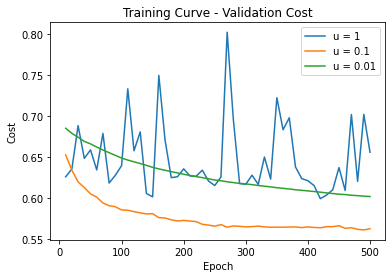

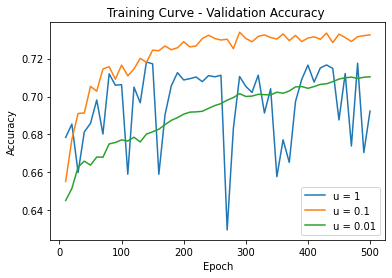

In [ ]:

plt.title("Training Curve - Validation Cost")
plt.plot(epochs_vec_f1, valid_cost_vec_f1, label="u = 1")
plt.plot(epochs_vec_f2, valid_cost_vec_f2, label="u = 0.1")
plt.plot(epochs_vec_f3, valid_cost_vec_f3, label="u = 0.01")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.legend(loc='best')
plt.show()

plt.title("Training Curve - Validation Accuracy ")
plt.plot(epochs_vec_f1, valid_acc_vec_f1, label="u = 1")
plt.plot(epochs_vec_f2, valid_acc_vec_f2, label="u = 0.1")
plt.plot(epochs_vec_f3, valid_acc_vec_f3, label="u = 0.01")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

**Explain and discuss your results here:**


Accourding to the plots , we can clearly see that $\mu = 0.1$ gives us the best accuracy and the smallets cost function for the selected batch size (100) and requires only~100 iterations to get to saturation

### Part (g) -- 7%

Find the optimial value of ${\bf w}$ and $b$ using your code. Explain how you chose
the learning rate $\mu$ and the batch size. Show plots demostrating good and bad behaviours.

In order to find the optimal learning rate $\mu$ we will try 2 options:
1. Use adaptive learning rate as seen in the lecture using the formula:  $\mu ^k = \frac{1}{0.01k +2}$ which gives us 0.5~0.15
2. Train the network a number of times while each time changing the value and choose the best solution

In [ ]:
w0 = np.random.randn(90)
b0 = np.random.randn(1)[0]

# Write your code here
w1,b1, valid_acc_vec1, epochs_vec1, valid_cost_vec1 = run_gradient_descent(train_norm_xs,train_ts,val_norm_xs,val_ts,w0, b0, mu=0.1, batch_size=100, max_iters=500 , adaptive_learning_rate= True)
w2,b2, valid_acc_vec2, epochs_vec2, valid_cost_vec2 = run_gradient_descent(train_norm_xs,train_ts,val_norm_xs,val_ts,w0, b0, mu=0.05, batch_size=100, max_iters=500)
w3,b3, valid_acc_vec3, epochs_vec3, valid_cost_vec3 = run_gradient_descent(train_norm_xs,train_ts,val_norm_xs,val_ts,w0, b0, mu=0.3, batch_size=100, max_iters=500)
w4,b4, valid_acc_vec4, epochs_vec4, valid_cost_vec4 = run_gradient_descent(train_norm_xs,train_ts,val_norm_xs,val_ts,w0, b0, mu=0.5, batch_size=100, max_iters=500)

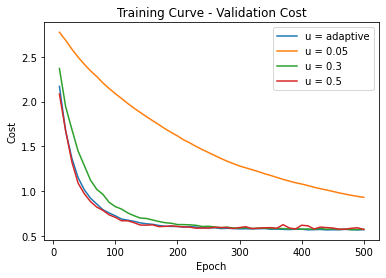

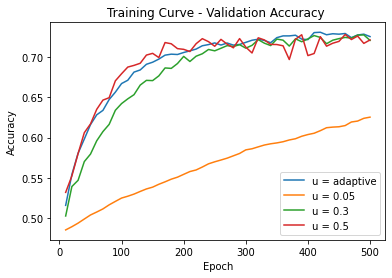

In [ ]:
plt.title("Training Curve - Validation Cost")
plt.plot(epochs_vec1, valid_cost_vec1, label="u = adaptive")
plt.plot(epochs_vec2, valid_cost_vec2, label="u = 0.05")
plt.plot(epochs_vec3, valid_cost_vec3, label="u = 0.3")
plt.plot(epochs_vec4, valid_cost_vec4, label="u = 0.5")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.legend(loc='best')
plt.show()

plt.title("Training Curve - Validation Accuracy ")
plt.plot(epochs_vec1, valid_acc_vec1, label="u = adaptive")
plt.plot(epochs_vec2, valid_acc_vec2, label="u = 0.05")
plt.plot(epochs_vec3, valid_acc_vec3, label="u = 0.3")
plt.plot(epochs_vec4, valid_acc_vec4, label="u = 0.5")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

**Explain and discuss your results here:**




We can see that we get the best results from the iterative $\mu$,
if we want $\mu$ to be constant we will choose 0.3 , we can see that $\mu$ = 0.5 is better at the first iterations but in the saturation zone its too noisy which means that we taking too large steps in the convex region like we have seen in the lecture:

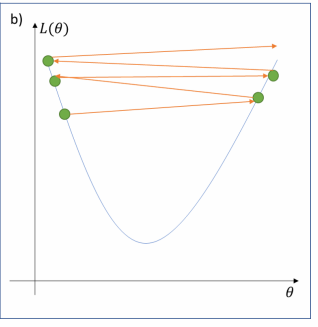

### Part (h) -- 15%

Using the values of `w` and `b` from part (g), compute your training accuracy, validation accuracy,
and test accuracy. Are there any differences between those three values? If so, why?

In [ ]:
# Write your code here

train_acc = get_accuracy(pred(w1 , b1 , train_norm_xs), train_ts)
val_acc = get_accuracy(pred(w1 , b1 , val_norm_xs), val_ts)
test_acc = get_accuracy(pred(w1 , b1 , test_norm_xs), test_ts)

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)


train_acc =  0.7235101458733669  val_acc =  0.7257  test_acc =  0.7144489637807476


**Explain and discuss your results here:**


We used w and b from the iterative $\mu$ calculation:

We expect to get the best accuracy from the train and validation data , this is because the training data was the data the network used in order to learn the parameters. The validation data was used by us to determine the smallest loss value for the network.

The test data accuracy we recieved is smaller but still very close to the train and validation data which means that the result are consistent for data that has similar probability distribution as the training data.

In addition , can generally see that the results are not very high (only 71% accuracy) which makes sense according to the fact we used only one layer whitout any hidden layers.

### Part (i) -- 15%

Writing a classifier like this is instructive, and helps you understand what happens when
we train a model. However, in practice, we rarely write model building and training code
from scratch. Instead, we typically use one of the well-tested libraries available in a package.

Use `sklearn.linear_model.LogisticRegression` to build a linear classifier, and make predictions about the test set. Start by reading the
[API documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Compute the training, validation and test accuracy of this model.

In [ ]:
y_train = []
for d in range(len(train_ts)):
  y_train.append(train_ts[d,0])

In [ ]:
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression
x_train= train_norm_xs.tolist()
model = LogisticRegression()
sklearn_model = model.fit(x_train, y_train)




train_acc = sklearn_model.score(train_norm_xs[1:10000],train_ts[1:10000])
val_acc = sklearn_model.score(val_norm_xs[1:10000],val_ts[1:10000])
test_acc = sklearn_model.score(test_norm_xs[1:10000], test_ts[1:10000])

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)

train_acc =  0.7260726072607261  val_acc =  0.7354735473547355  test_acc =  0.7224722472247225


**This parts helps by checking if the code worked.**
**Check if you get similar results, if not repair your code**
